# BREAKING BAD

#### TV Series 2008-2013 Crime/Drama/Thriller

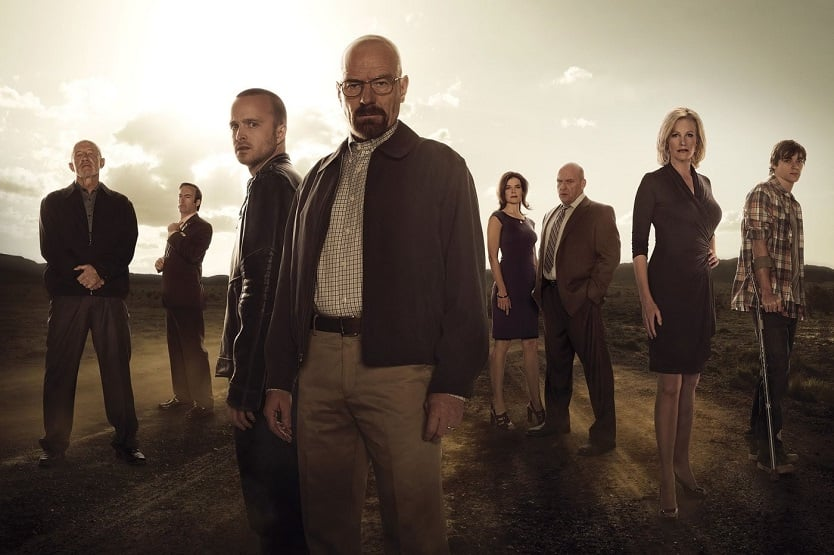

In [3]:
from IPython.display import Image

Image(filename='C://Users//Hande//Desktop//RR_8//amc.jpg')

Breaking Bad is an American crime drama television series created and produced by Vince Gilligan for AMC. Set and filmed in Albuquerque, New Mexico, the series follows Walter White (Bryan Cranston), an underpaid, dispirited high-school chemistry teacher struggling with a recent diagnosis of stage-three lung cancer. White turns to a life of crime and partners with a former student, Jesse Pinkman (Aaron Paul), to produce and distribute methamphetamine to secure his family's financial future before he dies, while navigating the dangers of the criminal underworld. Breaking Bad premiered on AMC on January 20, 2008, and concluded on September 29, 2013, after five seasons consisting of 62 episodes.

In [14]:
import pandas as pd
data = pd.read_csv("C:/Users/Hande/Desktop/RR_8/data/breaking_bad.csv", encoding='ISO-8859-1')


In [4]:
data.head()

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97


In [6]:
rating_stats = data['Rating_IMDB'].describe()
viewership_stats = data['U.S. viewers_million'].describe()
viewership_stats

count    57.000000
mean      2.324386
std       1.719224
min       0.970000
25%       1.460000
50%       1.710000
75%       2.290000
max      10.280000
Name: U.S. viewers_million, dtype: float64

In [7]:
# Basic statistics summary
stats_summary = pd.DataFrame({'IMDb Rating': rating_stats, 'Viewership (Millions)': viewership_stats})

In [8]:
# Basic statistics summary
stats_summary = pd.DataFrame({'IMDb Rating': rating_stats, 'Viewership (Millions)': viewership_stats})


In [9]:
# Let's plot the viewership over time now. For this, we need to convert the 'Date' column to datetime.
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

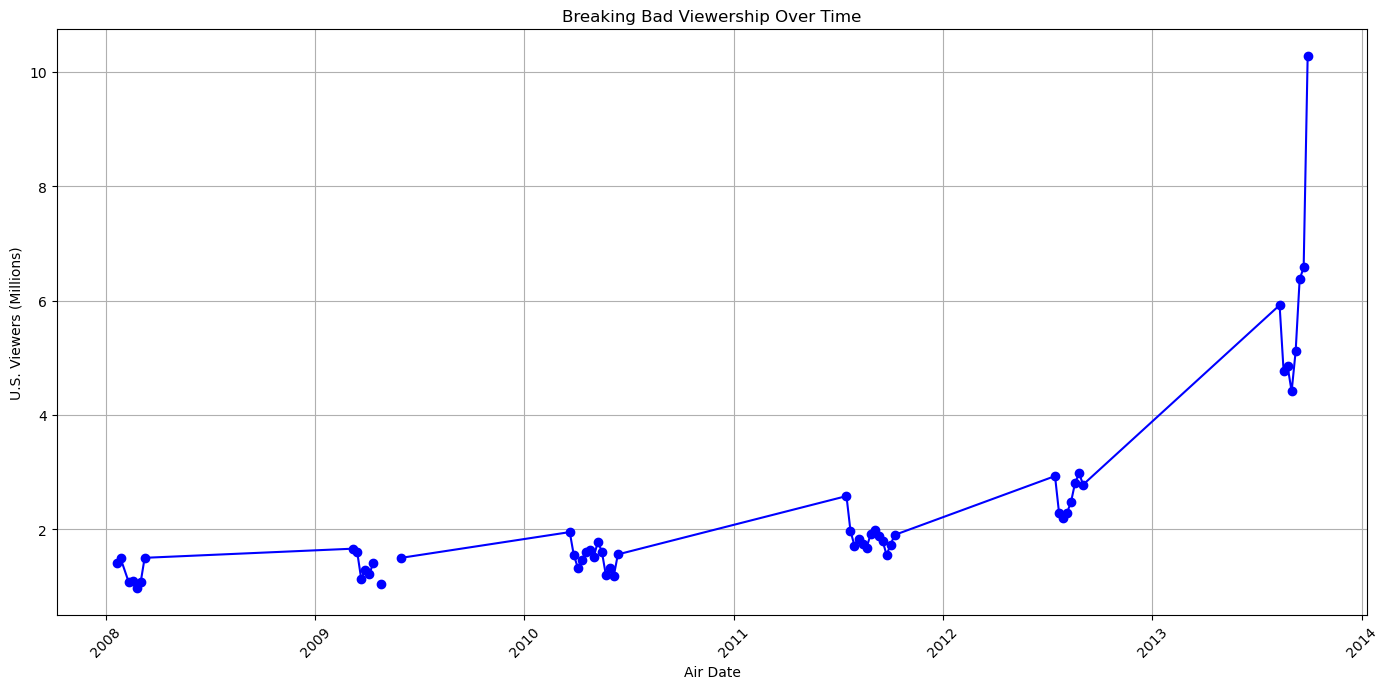

In [10]:

# Plotting the viewership over time.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['U.S. viewers_million'], marker='o', linestyle='-', color='blue')
plt.title('Breaking Bad Viewership Over Time')
plt.xlabel('Air Date')
plt.ylabel('U.S. Viewers (Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping

plt.show()



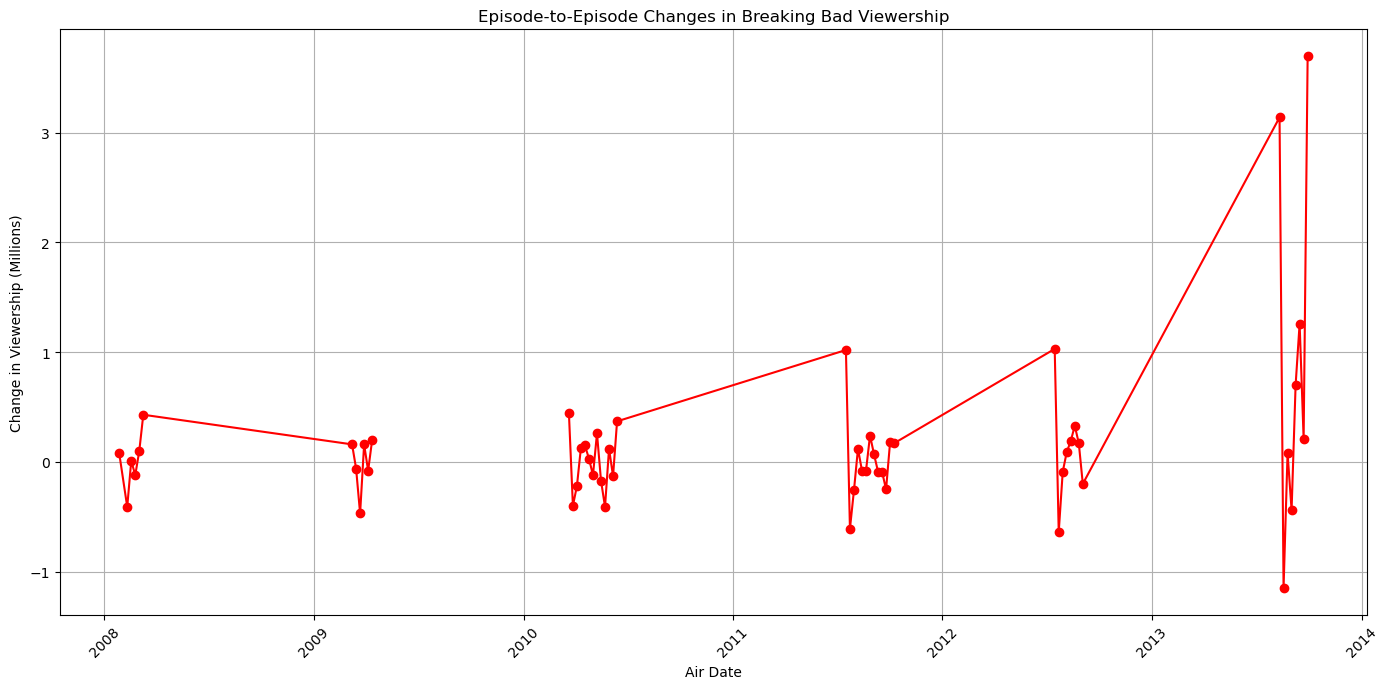

(       IMDb Rating  Viewership (Millions)
 count    62.000000              57.000000
 mean      9.022581               2.324386
 std       0.511962               1.719224
 min       7.800000               0.970000
 25%       8.700000               1.460000
 50%       8.900000               1.710000
 75%       9.450000               2.290000
 max      10.000000              10.280000,
 'The viewership experienced various changes over the course of the show. Notably, between seasons 3 and 5, the viewership changed by -7.74 million.')

In [11]:
# Next, let's calculate the episode-to-episode changes in viewership.
data['Viewership_Change'] = data['U.S. viewers_million'].diff()

# Plotting the changes in viewership from episode to episode.
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][1:], data['Viewership_Change'][1:], marker='o', linestyle='-', color='red')  # Skipping the first NaN value
plt.title('Episode-to-Episode Changes in Breaking Bad Viewership')
plt.xlabel('Air Date')
plt.ylabel('Change in Viewership (Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# Finally, let's prepare a text snippet describing the observed changes in viewership.
season_group = data.groupby('Season')['U.S. viewers_million']
season_viewership_change = season_group.last() - season_group.first()

# We will particularly look at the change between seasons 3 and 5
season_3_to_5_decrease = season_viewership_change.loc[3] - season_viewership_change.loc[5]

# Description of observed changes
change_description = (
    f"The viewership experienced various changes over the course of the show. Notably, "
    f"between seasons 3 and 5, the viewership changed by {season_3_to_5_decrease:.2f} million."
)

# Output the statistics summary and the change description.
stats_summary, change_description


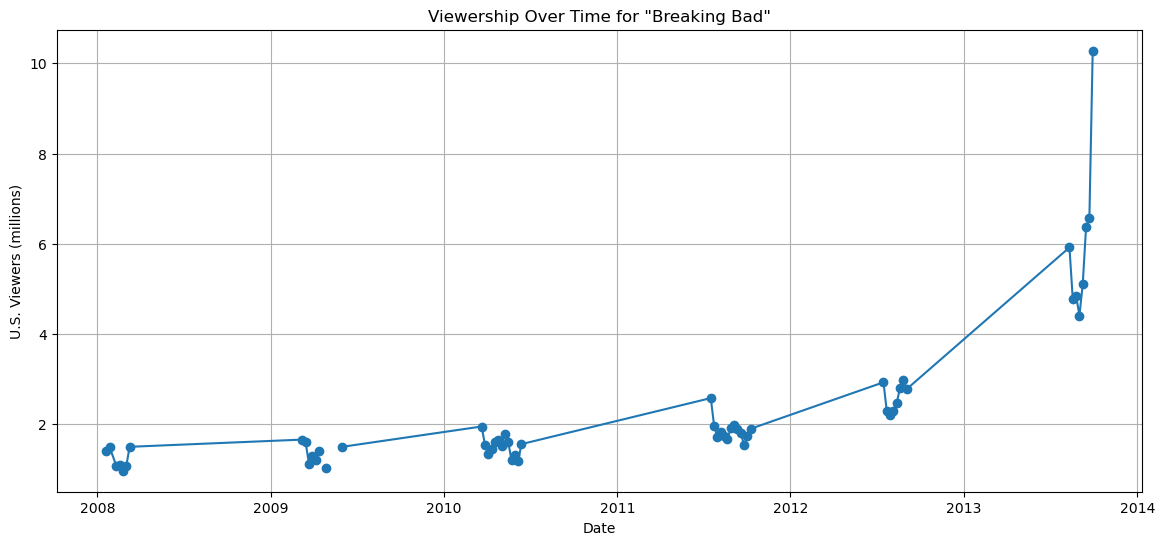

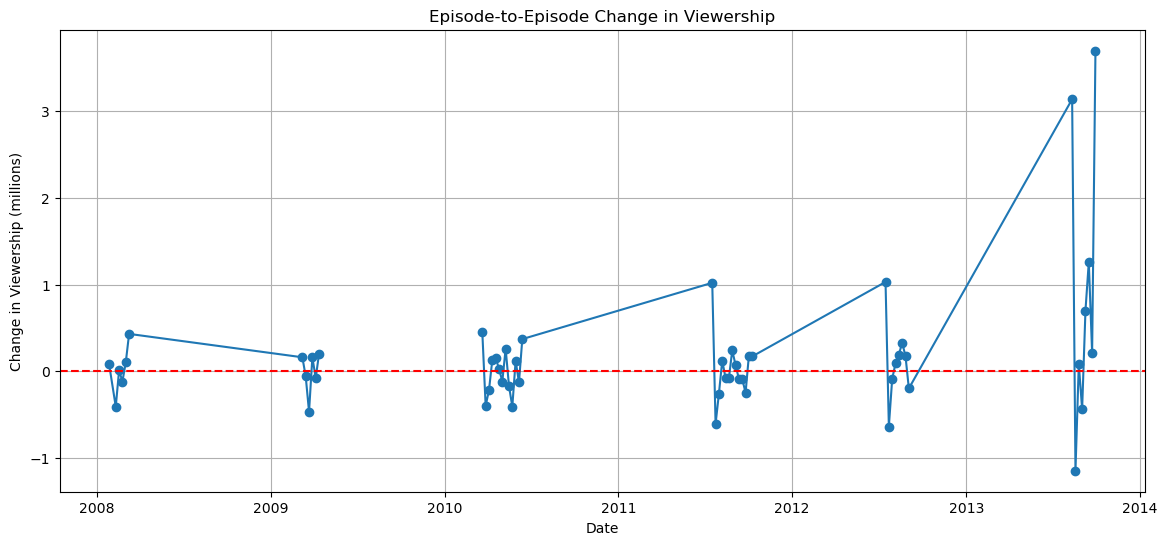

,Rating_IMDB,U.S. viewers_million
count,62.000000,57.000000
mean,9.022581,2.324386
std,0.511962,1.719224
min,7.800000,0.970000
25%,8.700000,1.460000
50%,8.900000,1.710000
75%,9.450000,2.290000
max,10.000000,10.280000


In [16]:
import matplotlib.pyplot as plt

breaking_bad_data = pd.read_csv("C:/Users/Hande/Desktop/RR_8/data/breaking_bad.csv", encoding='ISO-8859-1')

# Convert 'Date' column to datetime for better plotting
breaking_bad_data['Date'] = pd.to_datetime(breaking_bad_data['Date'])

# Basic statistics for Rating and Viewership
rating_viewership_stats = breaking_bad_data[['Rating_IMDB', 'U.S. viewers_million']].describe()

# Plotting the viewership over time
plt.figure(figsize=(14, 6))
plt.plot(breaking_bad_data['Date'], breaking_bad_data['U.S. viewers_million'], marker='o', linestyle='-')
plt.title('Viewership Over Time for "Breaking Bad"')
plt.xlabel('Date')
plt.ylabel('U.S. Viewers (millions)')
plt.grid(True)
plt.show()

# Calculate and plot episode-to-episode changes in viewership
breaking_bad_data['Viewership_change'] = breaking_bad_data['U.S. viewers_million'].diff()
plt.figure(figsize=(14, 6))
plt.plot(breaking_bad_data['Date'], breaking_bad_data['Viewership_change'], marker='o', linestyle='-')
plt.title('Episode-to-Episode Change in Viewership')
plt.xlabel('Date')
plt.ylabel('Change in Viewership (millions)')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at zero for reference
plt.grid(True)
plt.show()

rating_viewership_stats



In [17]:
# First, we group the data by season and get the first and last air date, number of episodes, and average viewership.
season_summary = breaking_bad_data.groupby('Season').agg({
    'Date': ['first', 'last'],
    'Episode': 'count',
    'U.S. viewers_million': ['mean', 'first', 'last']
}).reset_index()

# Rename the columns for clarity
season_summary.columns = [
    'Season', 'First Aired Date', 'Last Aired Date', 'Episodes',
    'Avg. Viewers (millions)', 'First Aired Viewers (millions)', 'Last Aired Viewers (millions)'
]

# Format the dates to match the style from Wikipedia (e.g., January 20, 2008)
season_summary['First Aired Date'] = season_summary['First Aired Date'].dt.strftime('%B %d, %Y')
season_summary['Last Aired Date'] = season_summary['Last Aired Date'].dt.strftime('%B %d, %Y')

# Now we will create a summary table
summary_table = season_summary[['Season', 'Episodes', 'First Aired Date', 'First Aired Viewers (millions)',
                                'Last Aired Date', 'Last Aired Viewers (millions)', 'Avg. Viewers (millions)']]

# Print out the summary table
summary_table


,Season,Episodes,First Aired Date,First Aired Viewers (millions),Last Aired Date,Last Aired Viewers (millions),Avg. Viewers (millions)
0,1,7,"January 20, 2008",1.41,"March 09, 2008",1.50,1.230000
1,2,13,"March 08, 2009",1.66,"May 31, 2009",1.50,1.355000
2,3,13,"March 21, 2010",1.95,"June 13, 2010",1.56,1.516923
3,4,13,"July 17, 2011",2.58,"October 09, 2011",1.90,1.866923
4,5,16,"July 15, 2012",2.93,"September 29, 2013",10.28,4.315625
